In [ ]:
#task3 

In [24]:
#import libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler

In [25]:
# Load the breast cancer dataset
cancer = load_breast_cancer()

In [26]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target


In [27]:
# Display the first few rows of the DataFrame
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [29]:
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [30]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [31]:
# Split the data into features (X) and target (y)
X = df.drop(columns='target')
y = df['target']

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((455, 30), (114, 30))

In [33]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Convert the scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Now you can use the head() method
print(X_train_scaled_df.head())
print(X_test_scaled_df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    -1.440753     -0.435319       -1.362085  -1.139118         0.780573   
1     1.974096      1.733026        2.091672   1.851973         1.319843   
2    -1.399982     -1.249622       -1.345209  -1.109785        -1.332645   
3    -0.981797      1.416222       -0.982587  -0.866944         0.059390   
4    -1.117700     -1.010259       -1.125002  -0.965942         1.269511   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.718921        2.823135            -0.119150       1.092662   
1          3.426275        2.013112             2.665032       2.127004   
2         -0.307355       -0.365558            -0.696502       1.930333   
3         -0.596788       -0.820203            -0.845115       0.313264   
4         -0.439002       -0.983341            -0.930600       3.394436   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [35]:
# Initialize and train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [37]:
print("y_pred",y_pred)
print("y_test",y_test)

y_pred [1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]
y_test 204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: target, Length: 114, dtype: int32


In [38]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



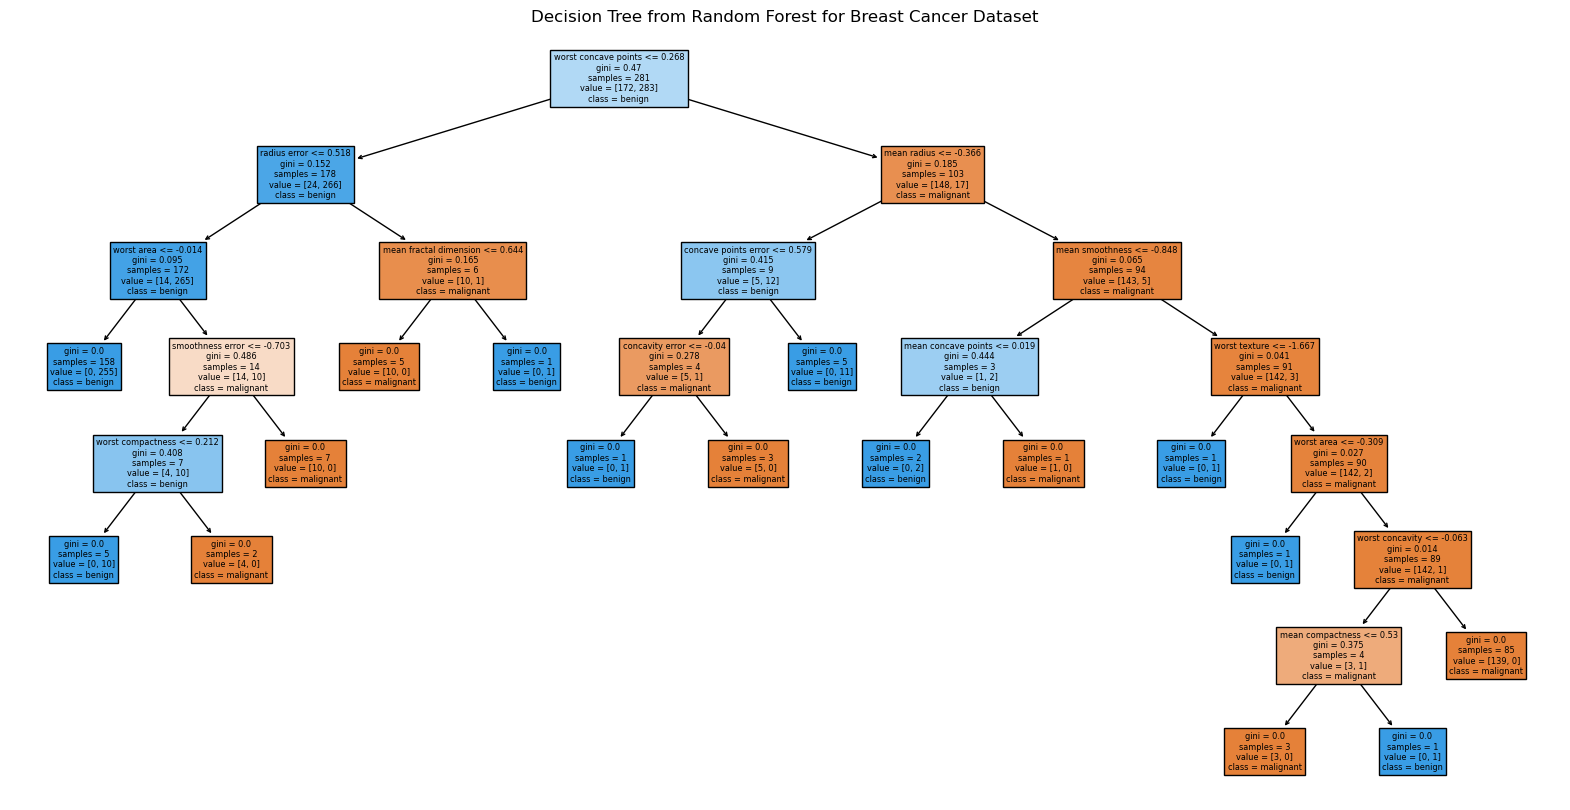

In [39]:
# Visualize one of the trees from the random forest
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)
plt.title("Decision Tree from Random Forest for Breast Cancer Dataset")
plt.show()

In [40]:
# Train Decision Tree Classifier with Gini criterion
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

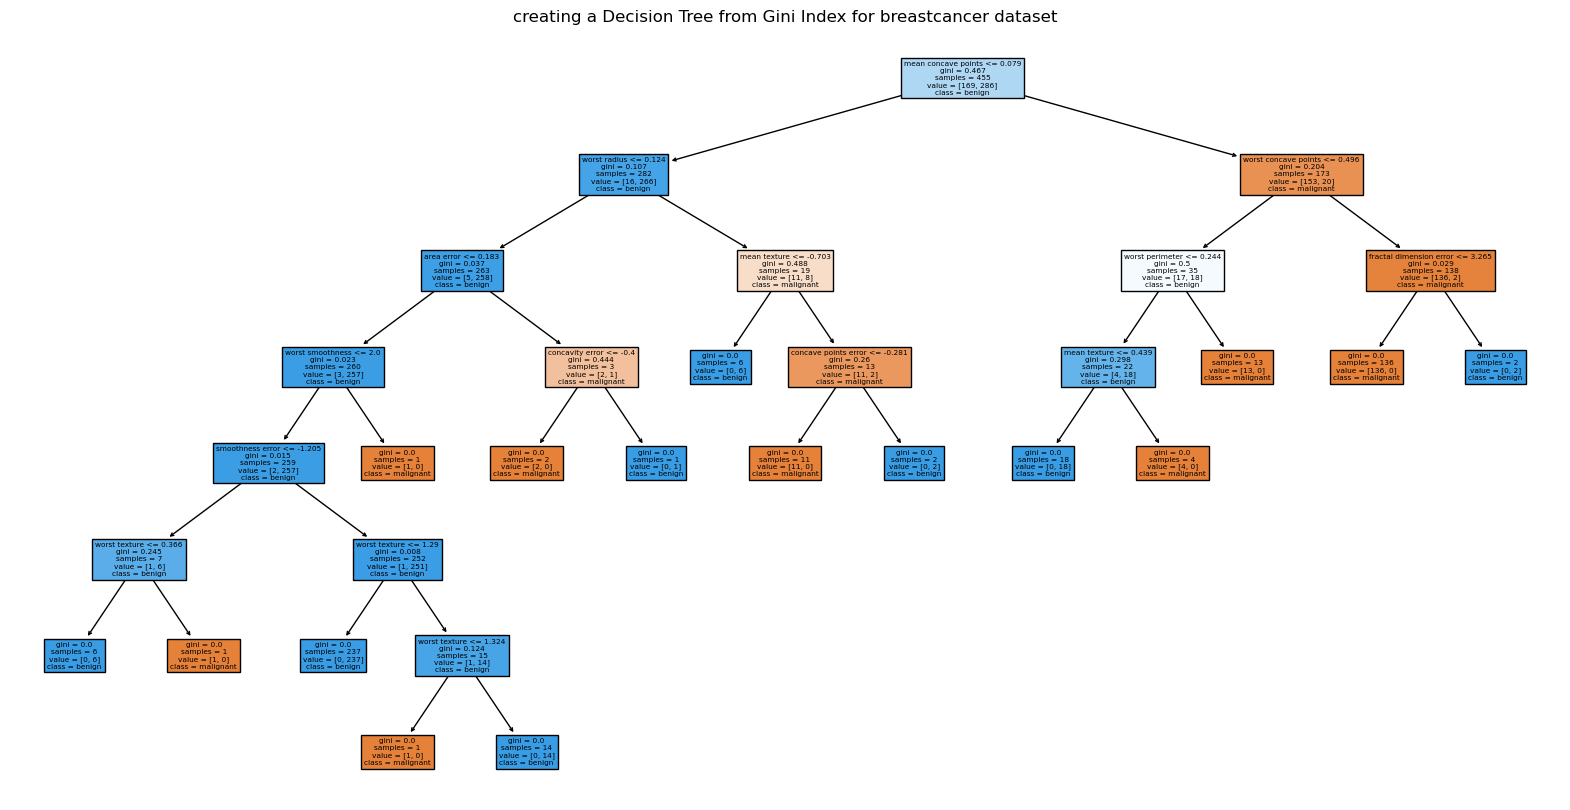

In [41]:
# Visualize the decision tree with Gini criterion
plt.figure(figsize=(20,10))
plot_tree(clf_gini, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)
plt.title('creating a Decision Tree from Gini Index for breastcancer dataset')
plt.show()

In [42]:
# Train Decision Tree Classifier with Entropy criterion
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

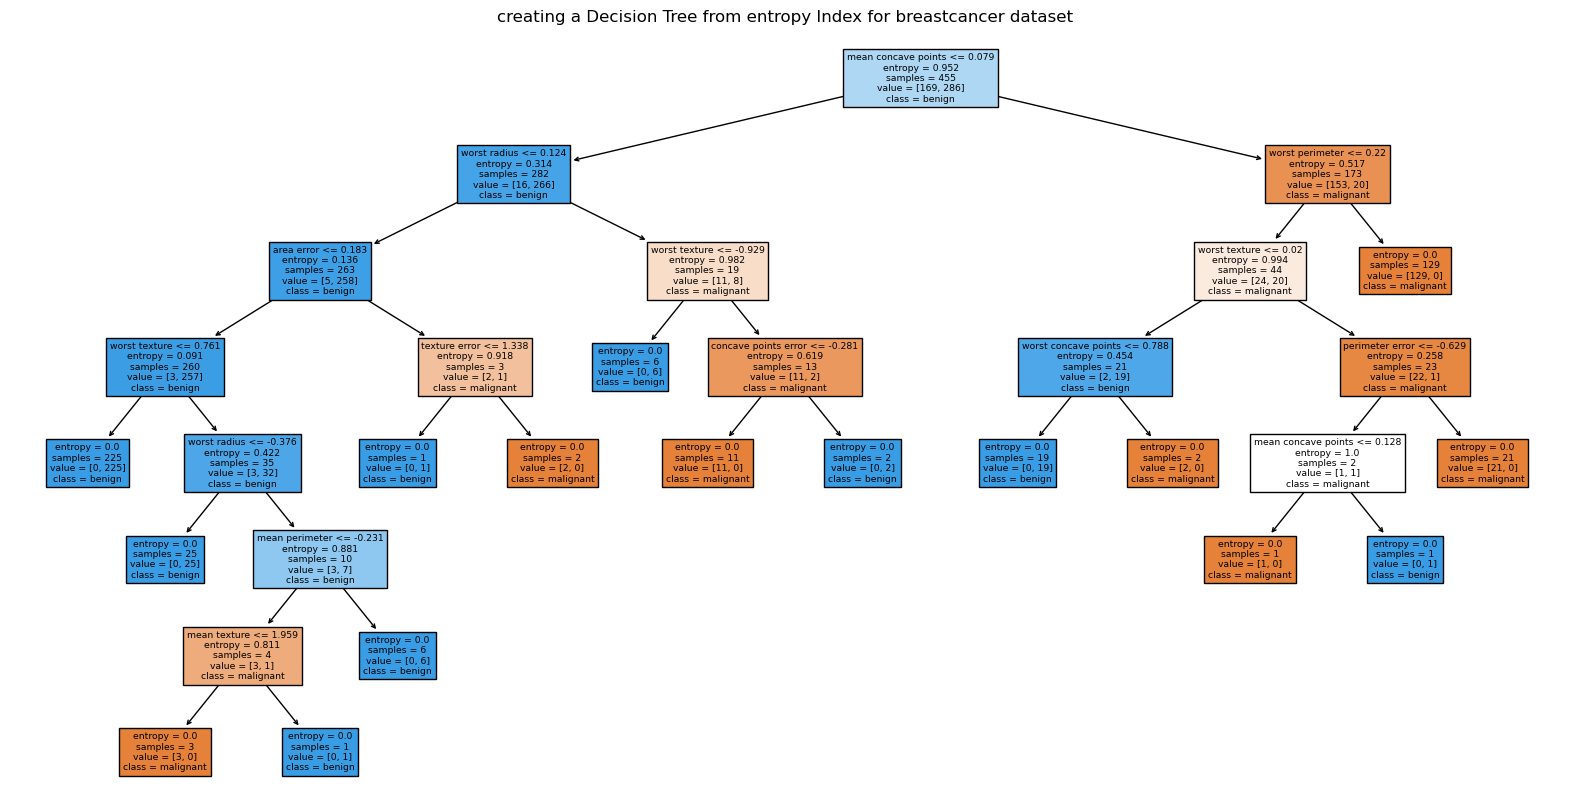

In [43]:
# Visualize the decision tree with entropy criterion
plt.figure(figsize=(20,10))
plot_tree(clf_entropy, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)
plt.title('creating a Decision Tree from entropy Index for breastcancer dataset')
plt.show()

In [43]:
# Make predictions
y_pred_gini = clf_gini.predict(X_test_scaled)
y_pred_entropy = clf_entropy.predict(X_test_scaled)

In [44]:
# Evaluate the models
print("Decision Tree with Gini Index")
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print("Classification Report:\n", classification_report(y_test, y_pred_gini))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))

print("\nDecision Tree with Entropy")
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("Classification Report:\n", classification_report(y_test, y_pred_entropy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))

Decision Tree with Gini Index
Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
 [[40  3]
 [ 3 68]]

Decision Tree with Entropy
Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
 [[38  5]
 [ 1 70]]


In [44]:
#RESULTS AND CONCLUSIONS

In [ ]:
#1 In this project ,I build a DeisionTreeClassifier model to predict the breast cancer of human beings
  The model yields a very good performance as indiated by the model accuracy in both the cases were 0.94736
 2.In both the cases the training set accuracy and testing set accuracy score are almost same
 3.The onfusion matrix and classification report yields very good model performance 